# Comparación de Rendimiento 

 - Quicksort Aleatorizado
 - Quicksort con Permutación
 - Quicksort Determinista


In [119]:
import Random
import Combinatorics: permutations
import Statistics: mean, std
using Plots;pyplot(legend=false)

Plots.PyPlotBackend()

In [120]:
numeros = [1,2,3,4,5,6,7]
#Crea todas las permutaciones posibles de 1 a 7
permutaciones = collect(permutations(numeros))

5040-element Array{Array{Int64,1},1}:
 [1, 2, 3, 4, 5, 6, 7]
 [1, 2, 3, 4, 5, 7, 6]
 [1, 2, 3, 4, 6, 5, 7]
 [1, 2, 3, 4, 6, 7, 5]
 [1, 2, 3, 4, 7, 5, 6]
 [1, 2, 3, 4, 7, 6, 5]
 [1, 2, 3, 5, 4, 6, 7]
 [1, 2, 3, 5, 4, 7, 6]
 [1, 2, 3, 5, 6, 4, 7]
 [1, 2, 3, 5, 6, 7, 4]
 [1, 2, 3, 5, 7, 4, 6]
 [1, 2, 3, 5, 7, 6, 4]
 [1, 2, 3, 6, 4, 5, 7]
 ⋮
 [7, 6, 5, 3, 1, 2, 4]
 [7, 6, 5, 3, 1, 4, 2]
 [7, 6, 5, 3, 2, 1, 4]
 [7, 6, 5, 3, 2, 4, 1]
 [7, 6, 5, 3, 4, 1, 2]
 [7, 6, 5, 3, 4, 2, 1]
 [7, 6, 5, 4, 1, 2, 3]
 [7, 6, 5, 4, 1, 3, 2]
 [7, 6, 5, 4, 2, 1, 3]
 [7, 6, 5, 4, 2, 3, 1]
 [7, 6, 5, 4, 3, 1, 2]
 [7, 6, 5, 4, 3, 2, 1]

In [121]:
# Número total de Permutaciones
length(permutaciones)

5040

In [122]:
function particion(lista)
    
    global conteo
    
    pivote = lista[1]
    menores = []
    mayores = []
    
    for i in 2:length(lista) #debido a que el pivote es 0, comenzamos en 1
        if lista[i] < pivote
            conteo = conteo + 1
            push!(menores, lista[i])
        else
            conteo = conteo + 1
            push!(mayores, lista[i])
        end
    end

    return menores, pivote, mayores
end

function qs(lista)
    
    if length(lista) < 2
        return lista
    end
    
    menores, pivote, mayores = particion(lista)
    
    return vcat(qs(menores), [pivote], qs(mayores))
end


qs (generic function with 1 method)

## Función Quicksort Determinista

In [123]:
QDeterminista = []

for i in 1:length(permutaciones)
    conteo = 0
    aordenar = (permutaciones[i])
    aver = qs(aordenar)
    push!(QDeterminista, conteo)
end

## Función Quicksort con Permutaciones

In [124]:
QPermutacion = []
for i in 1:length(permutaciones)
    conteo = 0
    porordenar = Random.shuffle(permutaciones[i])
    a = qs(porordenar)
    push!(QPermutacion, conteo)
end

In [125]:
function pale(lista)
    
    #global conteo
    
    piv = rand(1:length(lista))
    pivote = lista[piv]
    menores = []
    mayores = []
    
    for i in 1:length(lista) #debido a que el pivote es 0, comenzamos en 1
        if lista[i] < pivote && i != piv
            global conteo = conteo + 1
            push!(menores, lista[i])
        elseif i != piv
            global conteo = conteo + 1
            push!(mayores, lista[i])
        end
    end
    return menores, pivote, mayores
end

function qsale(lista)
    
    if length(lista) < 2
        return lista
    end

    menores, pivote, mayores = pale(lista)
    
    return vcat(qsale(menores), [pivote], qsale(mayores))
end

qsale (generic function with 1 method)

## Función Quicksort Aleatorizado

In [126]:
QAleatorizado = []
for i in 1:length(permutaciones)
    conteo = 0
    entran = (permutaciones[i])
    a = qsale(entran)
    push!(QAleatorizado, conteo)
end

### Calculamos el promedio de todas las permutaciones:

In [127]:
println("Quicksort Aleatorizado: ", mean(QAleatorizado))
println("Quicksort con Permutación: ", mean(quickshuf))
println("Quicksort Determinista: ", mean(QDeterminista))

Quicksort Aleatorizado: 13.526785714285714
Quicksort con Permutación: 13.51547619047619
Quicksort Determinista: 13.485714285714286


### Número de comparaciones de cada algoritmo a cada permutación del conjunto S.

In [128]:
println("Quicksort Aleatorizado: ", std(QAleatorizado))
println("Quicksort con Permutación: ", std(quickshuf))
println("Quicksort Determinista: ", std(QDeterminista))

Quicksort Aleatorizado: 2.348585346818427
Quicksort con Permutación: 2.3692979349028276
Quicksort Determinista: 2.3442121717553457


# Graficación de todos los Elementos 
 - Quicksort Aleatorizado
 - Quicksort con Permutación
 - Quicksort Determinista

In [129]:
#Promedio
m1 = mean(QAleatorizado)
m2 = mean(QPermutacion)
m3 = mean(QDeterminista)

#Número de comparaciones
std1 = std(QAleatorizado)
std2 = std(quickshuf)
std3 = std(QDeterminista)

vm1 = Real[]
vm2 = Real[]
vm3 = Real[]

vstd1u = Real[]
vstd2u = Real[]
vstd3u = Real[]

vstd1d = Real[]
vstd2d = Real[]
vstd3d = Real[]


for i in 1:length(5040)
    push!(vm1, m1)
    push!(vm2, m2)
    push!(vm3, m3)
    push!(vstd1u, m1 + std1)
    push!(vstd2u, m2 + std2)
    push!(vstd3u, m3 + std3)
    push!(vstd1d, m1 - std1)
    push!(vstd2d, m2 - std2)
    push!(vstd3d, m3 - std3)
end

## Comparación del Quicksort Determinista, con Permutación y Aleatorizado

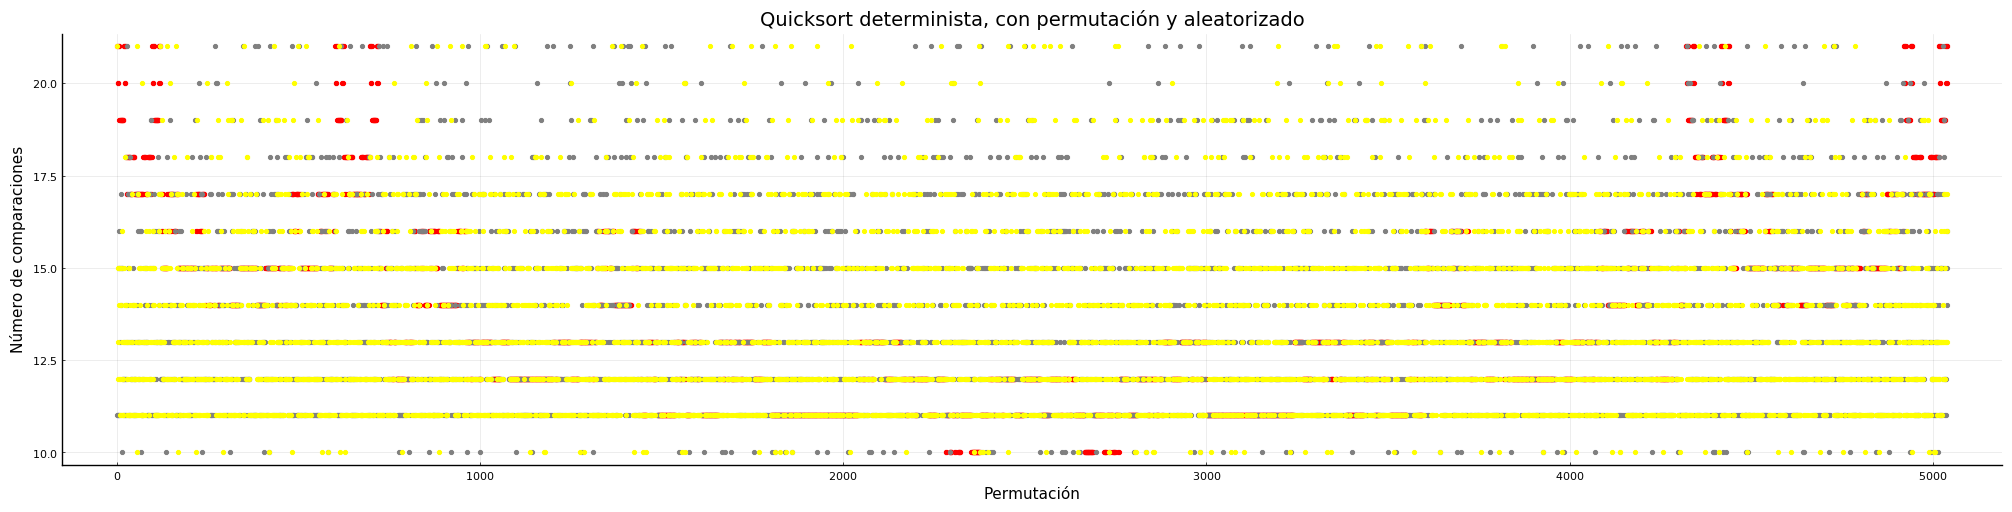

In [130]:
p = plot(size=(2000, 500))
plot!(xlabel = "Permutación", ylabel = "Número de comparaciones")
plot!(title="Quicksort determinista, con permutación y aleatorizado")

plot!(QDeterminista, markershape=:o, markercolor=:red, lw=0, markerstrokewidth=0)
plot!(QPermutacion, markershape=:o, markercolor=:gray, lw=0, markerstrokewidth=0)
plot!(QAleatorizado, markershape=:o, markercolor = :yellow, lw=0, markerstrokewidth=0)

plot!(vm2, markercolor=:red)
plot!(vm1, markercolor=:yellow,)
plot!(vm3, markercolor = :gray)

plot!(vstd2u, markercolor=:red)
plot!(vstd1u, markercolor=:yellow,)
plot!(vstd3u, markercolor = :gray)

plot!(vstd2d, markercolor=:red)
plot!(vstd1d, markercolor=:yellow,)
plot!(vstd3d, markercolor = :gray)

savefig("grafqs-julia.png")

### Resultados del número de comparaciones de Quicksort Determinista

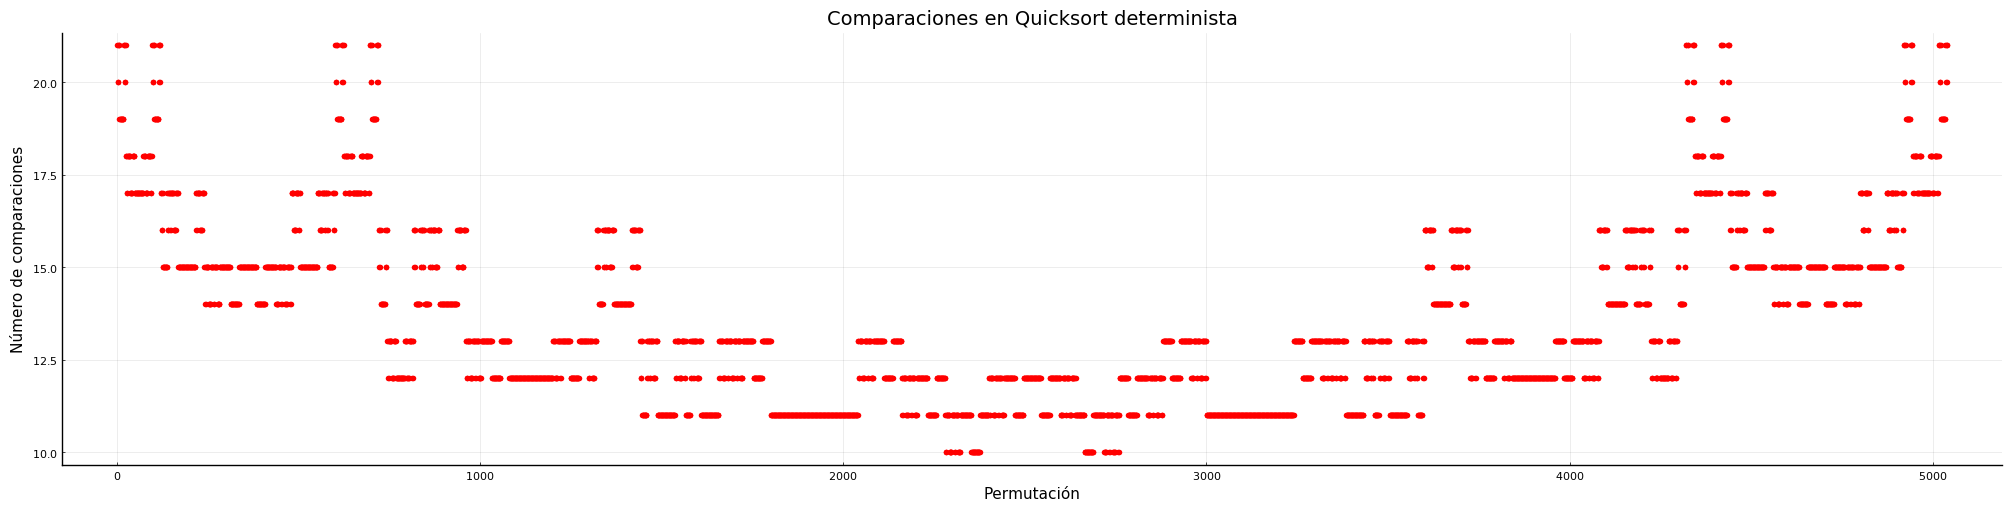

In [131]:
p2 = plot(size=(2000,500),title="Comparaciones en Quicksort determinista")
scatter!(1:(length(QDeterminista)), QDeterminista, markercolor=:red, markerstrokewidth=0)
plot!(xlabel = "Permutación", ylabel = "Número de comparaciones")
savefig("qsdet-julia.png")

### Resultados del número de comparaciones de Quicksort con Permutaciones

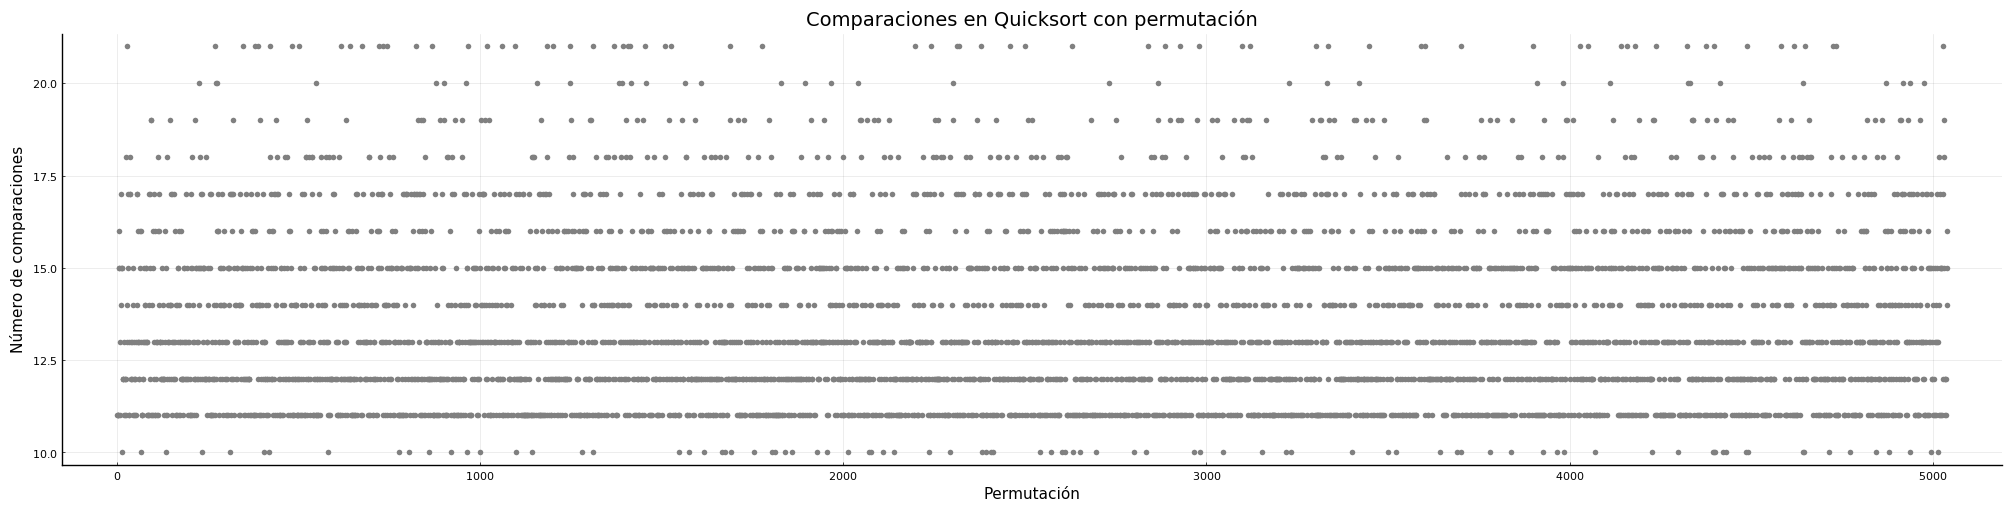

In [132]:
p3 = plot(size=(2000,500), title="Comparaciones en Quicksort con permutación")
scatter!(1:(length(quickshuf)), QPermutacion, markercolor=:gray, markerstrokewidth=0)
plot!(xlabel = "Permutación", ylabel = "Número de comparaciones")
savefig("qsperm-julia.png")

### Resultados del número de comparaciones de Quicksort Aleatorizado

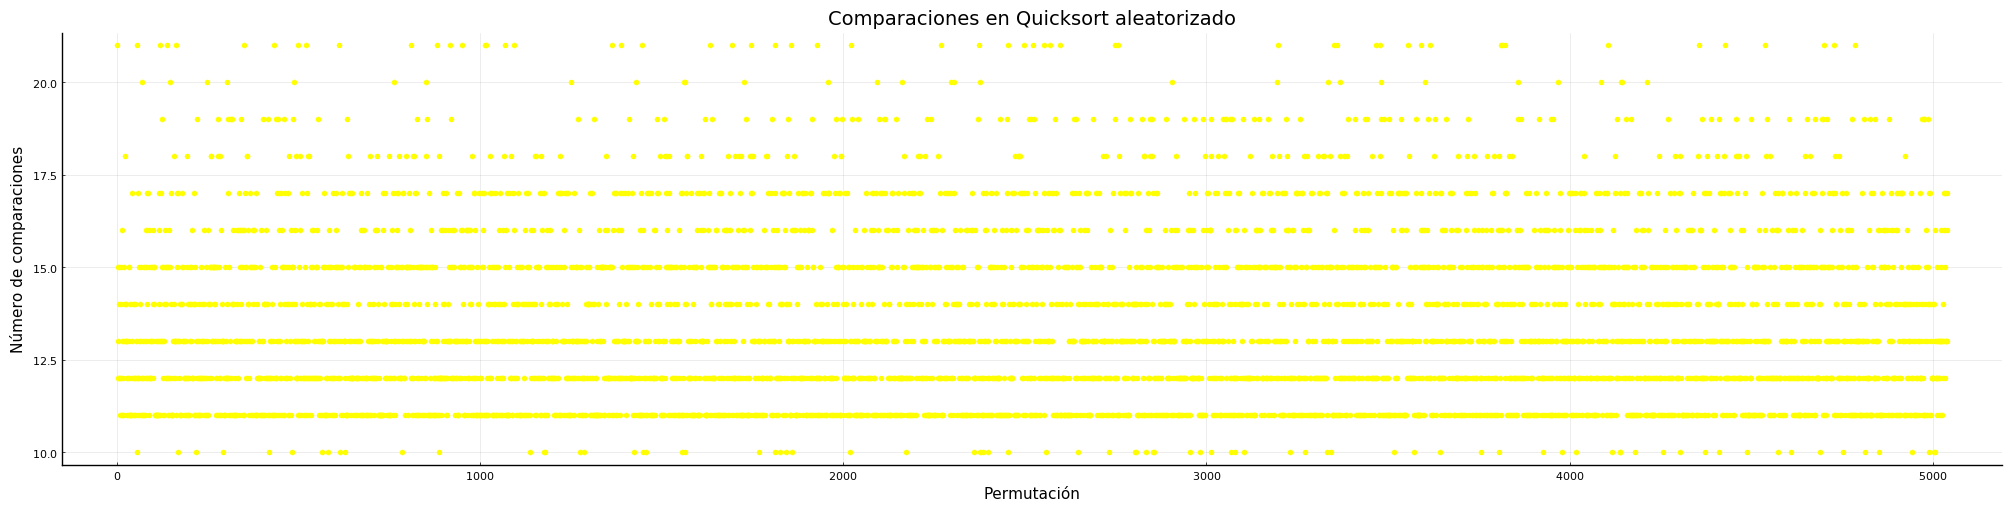

In [133]:
p3 = plot(size=(2000,500), title="Comparaciones en Quicksort aleatorizado")
scatter!(1:(length(QAleatorizado)), QAleatorizado, markercolor=:yellow, markerstrokewidth=0)
plot!(xlabel = "Permutación", ylabel = "Número de comparaciones")
savefig("qsale-julia.png")

### Número de comparaciones en el peor de los casos

In [134]:
println("Quicksort Aleatorizado: ", QAleatorizado[5039])
println("Quicksort con Permutación: ", QPermutacion[5039])
println("Quicksort Determinista: ", QDeterminista[5039])

Quicksort Aleatorizado: 17
Quicksort con Permutación: 15
Quicksort Determinista: 21
